# hw6

### 1, ISLP chapter 7 exercise #1

#### (a)

Since f(x)=f1(x), we have that the constant that's multiplied to x with different orders equals in two function, also we have when $x<=\epsilon$, there doesn't exist the last section of the function.

Thus we have $a_1=\beta_0,b_1=\beta_1,c_1=\beta_2, d_1=\beta_3$

#### (b)

Since f(x)=f1(x), we have that the constant that's multiplied to x with different orders equals in two function, also we have when $x>\xi, (x-\xi)^3=x^3-3\xi x^2+3(\xi)^2x-(\xi)^3$

Thus we have $a_2=\beta_0-\beta_4(\xi)^3, b_2=\beta_1+3\beta_4 (\xi)^2,c_2=\beta_2-3\beta_4 \xi, d_2=\beta_3+\beta_4$

#### (c)

$f1(\epsilon)=\beta_0+\beta_1 \xi+\beta_2 (\xi)^2+\beta_3 (\xi)^3$

$f2(\epsilon)=\beta_0-\beta_4(\xi)^3+(\beta_1+3\beta_4 (\xi)^2) \xi+(\beta_2-3\beta_4 \xi) (\xi)^2+(\beta_3+\beta_4) (\xi)^3=\beta_0+\beta_1 \xi+\beta_2 (\xi)^2+\beta_3 (\xi)^3$

so we have $f1(\xi)=f2(\xi)$, f(x) is continuous at $\xi$

#### (d)

$(f1(\epsilon))'=\beta_1+2\beta_2 \xi+3\beta_3 (\xi)^2$

$(f2(\epsilon))'=-3\beta_4(\xi)^2+6\beta_4(\xi)^2+\beta_1+3\beta_4(\xi)^2-3\beta_4(\xi)^2+2\beta_2 \xi-6\beta_4(\xi)^2+3(\beta_3+\beta_4)(\xi)^2=\beta_1+2\beta_2 \xi+3\beta_3 (\xi)^2$

so we have $f1(\xi)'=f2(\xi)'$, f'(x) is continuous at $\xi$

#### (e)

$(f1(\epsilon))''=2\beta_2+6\beta_3 \xi$

$(f2(\epsilon))''=-6\beta_4\xi+12\beta_4\xi+6\beta_4\xi-6\beta_4\xi+2\beta_2-12\beta_4\xi+6(\beta_3+\beta_4)\xi=2\beta_2+6\beta_3 \xi$

so we have $f1(\xi)''=f2(\xi)''$, f''(x) is continuous at $\xi$

### 2, ISLP chapter 7 exercise #2.

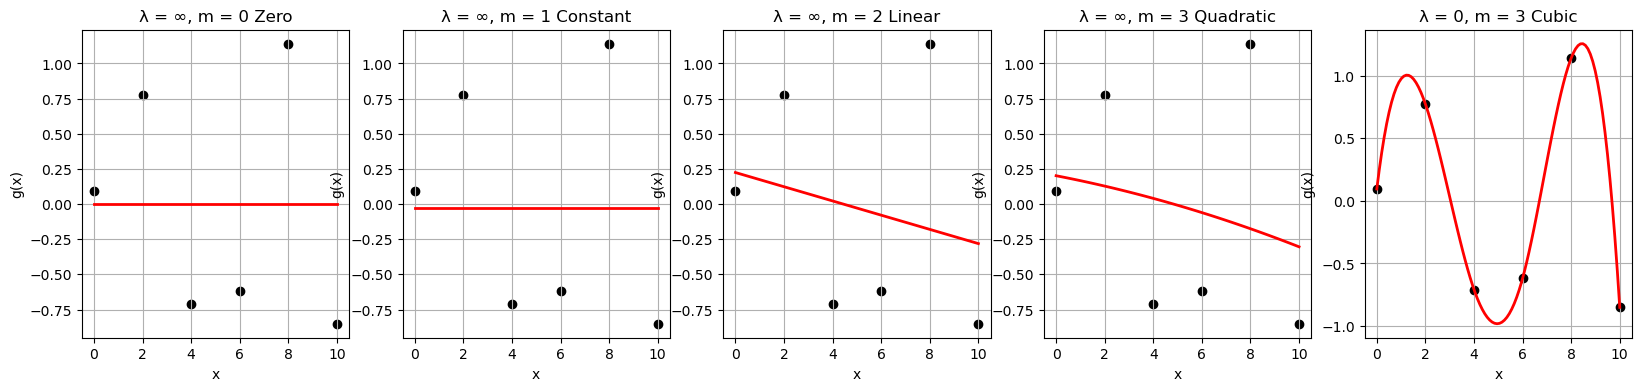

In [36]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12)
x = np.linspace(0, 10, 6)
y = np.sin(x) + np.random.normal(scale=0.2, size=len(x))
x_smooth = np.linspace(0, 10, 100)
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
# (a)
axs[0].scatter(x, y, color='black')
axs[0].plot(x_smooth, np.zeros_like(x_smooth), 'r', lw=2)
axs[0].set_title("λ = ∞, m = 0 Zero")
# (b) 
mean_y = np.mean(y)
axs[1].scatter(x, y, color='black')
axs[1].plot(x_smooth, np.full_like(x_smooth, mean_y), 'r', lw=2)
axs[1].set_title("λ = ∞, m = 1 Constant")
# (c)
coeffs = np.polyfit(x, y, 1)
y_linear = np.polyval(coeffs, x_smooth)
axs[2].scatter(x, y, color='black')
axs[2].plot(x_smooth, y_linear, 'r', lw=2)
axs[2].set_title("λ = ∞, m = 2 Linear")
# (d)
coeffs_quad = np.polyfit(x, y, 2)
y_quad = np.polyval(coeffs_quad, x_smooth)
axs[3].scatter(x, y, color='black')
axs[3].plot(x_smooth, y_quad, 'r', lw=2)
axs[3].set_title("λ = ∞, m = 3 Quadratic")
# (e)
from scipy.interpolate import CubicSpline
spline = CubicSpline(x, y)
y_spline = spline(x_smooth)
axs[4].scatter(x, y, color='black')
axs[4].plot(x_smooth, y_spline, 'r', lw=2)
axs[4].set_title("λ = 0, m = 3 Cubic")
for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("g(x)")
    ax.grid(True)
plt.show()

### 3,ISLP chapter 7 exercise #3.

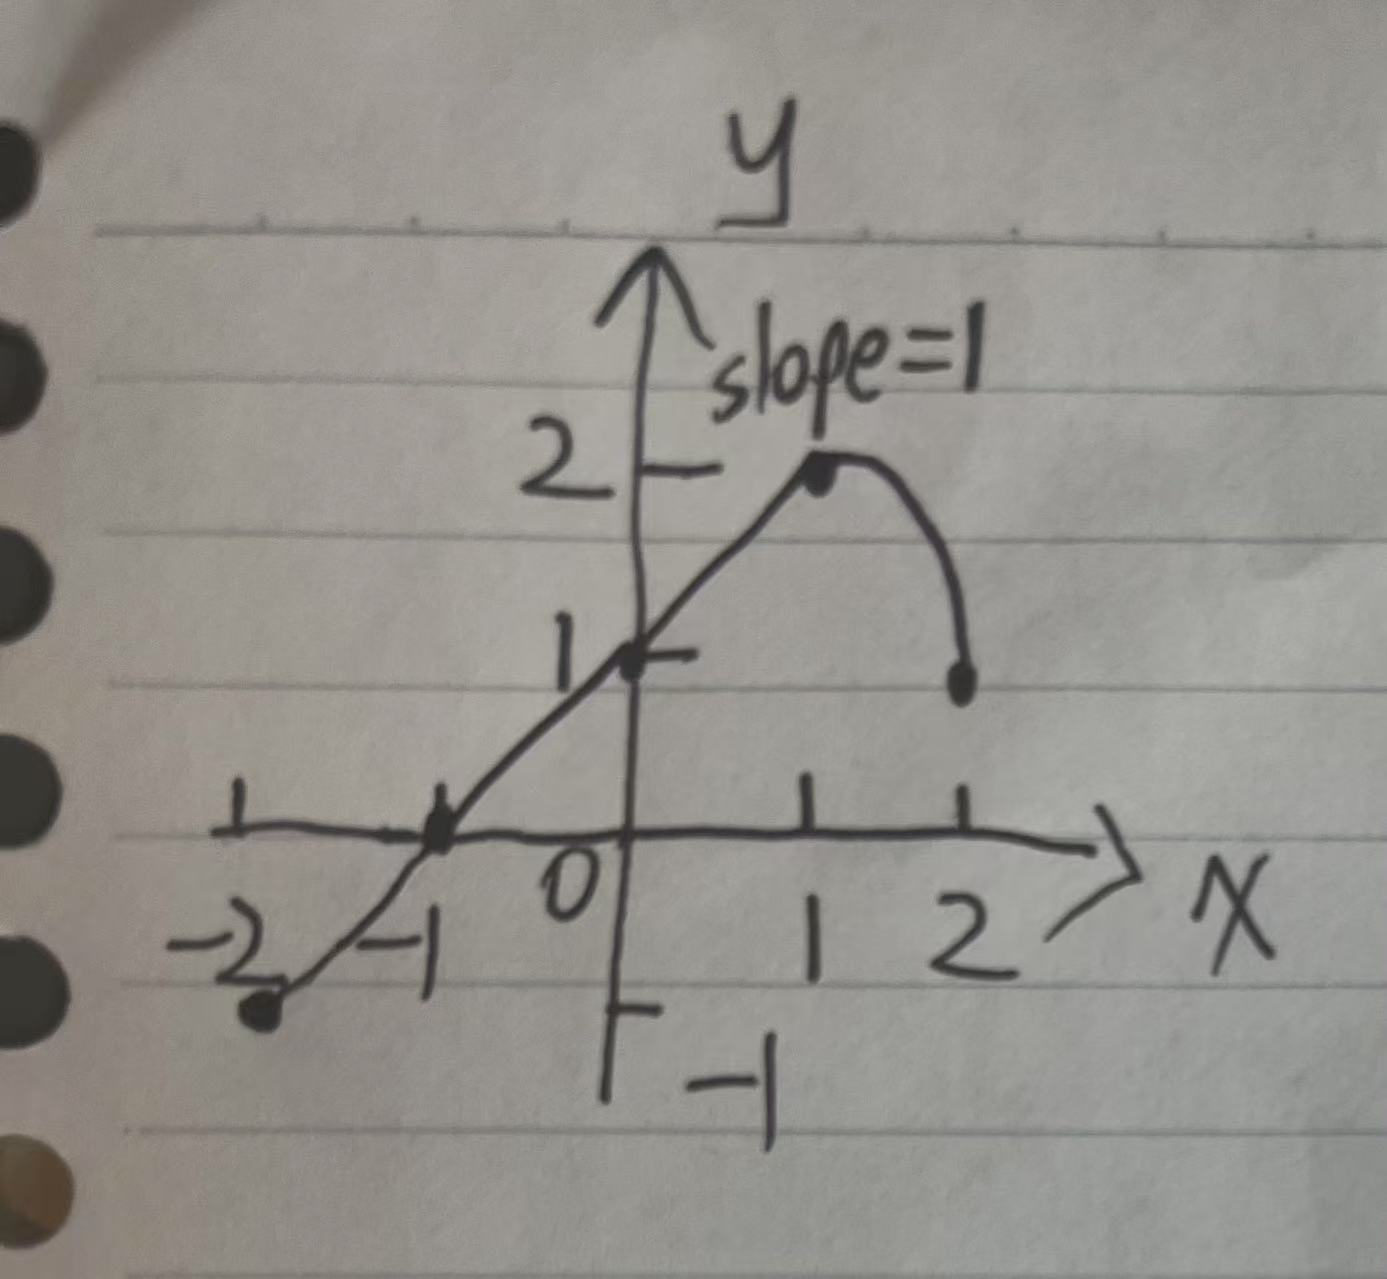

In [39]:
from IPython.display import display
from PIL import Image
img = Image.open("C:\\Users\\DELL\\Downloads\\d0ac3c660263c8061a4277d115ef1fc.jpg")
display(img)

### 4,ISLP chapter 7 exercise #4 

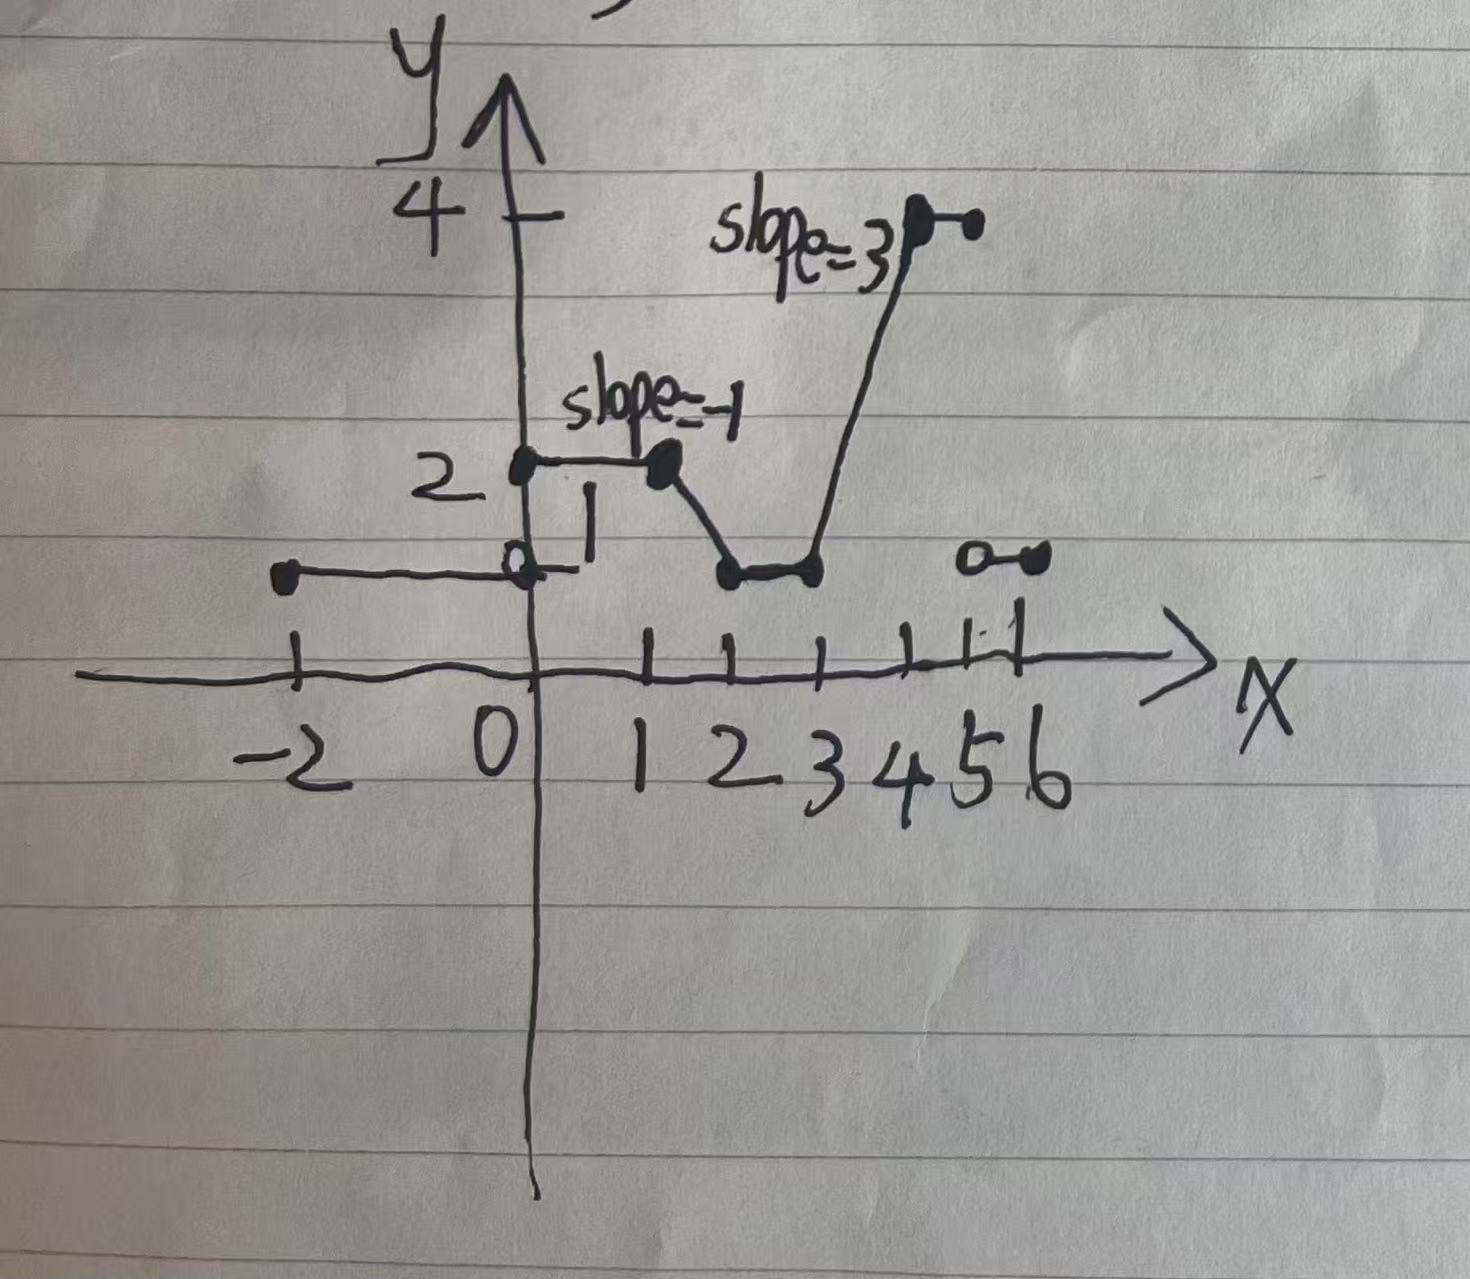

In [42]:
from IPython.display import display
from PIL import Image
img = Image.open("C:\\Users\\DELL\\Downloads\\cda2be742e45b3006eaccbd2aff6635.jpg")
display(img)

### 5

#### (a)

False, for continuous outcomes

#### (b)

False, more flexible.

#### (c)

True

#### (d)

False, doesn't assume that

### 6

#### (a)

False, are defined across the entire domain

#### (b)

False, opposite to the statement

#### (c)

True

#### (d)

False, both are smooth

### 7

#### (a)

Spline Regression: MSE = 0.0059
Polynomial Regression (Degree 12): MSE = 593.4142
KNN Regression (13 Neighbors): MSE = 0.0055
Model with highest error: Polynomial Regression (Degree 12)


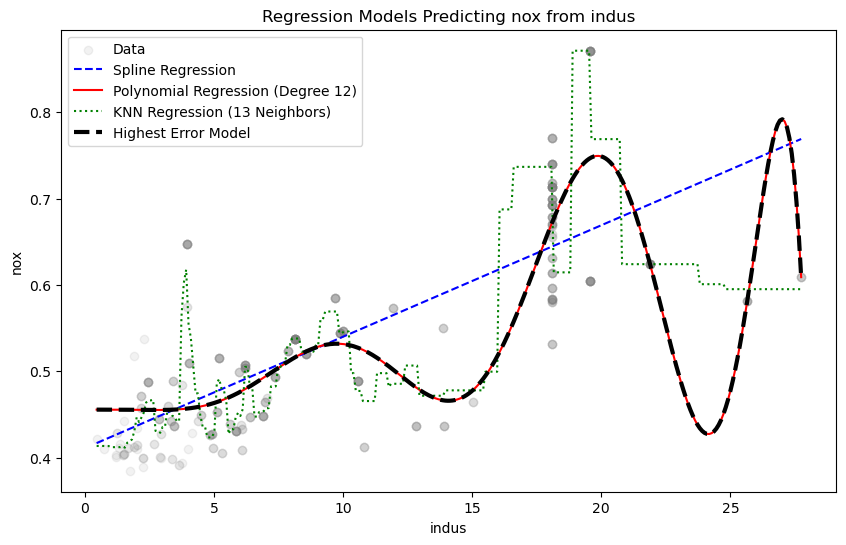

In [64]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import SplineTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
boston= pd.read_csv("C:\\Users\\DELL\\Downloads\\boston.csv")
X = boston[['indus']].values
y = boston['nox'].values
knots = np.array([0, 12, 17, 30]).reshape(-1, 1)
spline = SplineTransformer(n_knots=len(knots)+2, knots=knots, degree=3, include_bias=False)
X_spline = spline.fit_transform(X)
spline_model = LinearRegression().fit(X_spline, y)
poly_features = PolynomialFeatures(degree=12)
poly_model = make_pipeline(poly_features, LinearRegression())
knn_model = KNeighborsRegressor(n_neighbors=13)
models = {
    "Spline Regression": spline_model,
    "Polynomial Regression (Degree 12)": poly_model,
    "KNN Regression (13 Neighbors)": knn_model
}
mse_scores = {}
for name, model in models.items():
    mse = -np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=4))
    mse_scores[name] = mse
for name, mse in mse_scores.items():
    print(f"{name}: MSE = {mse:.4f}")
spline_model.fit(X, y)
poly_model.fit(X, y)
knn_model.fit(X, y)
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
spline_pred = spline_model.predict(X_plot)
poly_pred = poly_model.predict(X_plot)
knn_pred = knn_model.predict(X_plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.1, label="Data", color="gray")
plt.plot(X_plot, spline_pred, label="Spline Regression", linestyle="dashed", color="blue")
plt.plot(X_plot, poly_pred, label="Polynomial Regression (Degree 12)", linestyle="solid", color="red")
plt.plot(X_plot, knn_pred, label="KNN Regression (13 Neighbors)", linestyle="dotted", color="green")
worst_model = max(mse_scores, key=mse_scores.get)
print(f"Model with highest error: {worst_model}")
if worst_model == "Spline Regression":
    plt.plot(X_plot, spline_pred, label="Highest Error Model", linewidth=3, color="black", linestyle="dashed")
elif worst_model == "Polynomial Regression (Degree 12)":
    plt.plot(X_plot, poly_pred, label="Highest Error Model", linewidth=3, color="black", linestyle="dashed")
else:
    plt.plot(X_plot, knn_pred, label="Highest Error Model", linewidth=3, color="black", linestyle="dashed")
plt.xlabel("indus")
plt.ylabel("nox")
plt.title("Regression Models Predicting nox from indus")
plt.legend()
plt.show()

From the result, it seems that KNN regression gives the lowest error.

Since the model with largest MSE is the worst, and here the MSE of polynomial is clearly much larger than the MSE of other two, so we highlight it to warn that it's not accurate and avoid using it.

#### (b)

##### i

In [69]:
from pygam import LinearGAM, s, l
boston= pd.read_csv("C:\\Users\\DELL\\Downloads\\boston.csv")
lambda_values = [0.5, 1, 5, 10]
lams = [lambda_values] * 3
X = boston[['dis', 'indus', 'rad']].values
y = boston['nox'].values
gam = LinearGAM(s(0) + s(1) + s(2))
best_gam = gam.gridsearch(X, y, lam=lams)
print("Best lambda values:", best_gam.lam)

100% (64 of 64) |########################| Elapsed Time: 0:00:02 Time:  0:00:020000


Best lambda values: [[10.0], [1.0], [1.0]]


The best one is 10 and 1.

#### ii

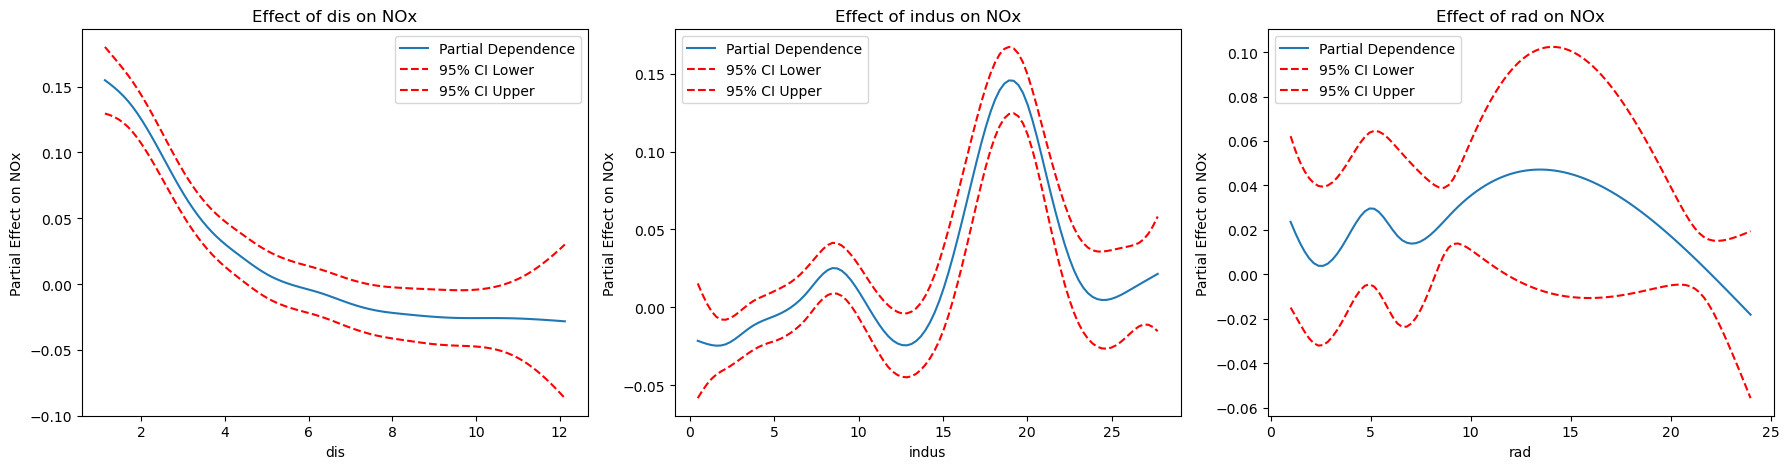

In [73]:
features = ['dis', 'indus', 'rad']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axs):
    XX = best_gam.generate_X_grid(term=i)
    pdep, confi = best_gam.partial_dependence(term=i, X=XX, width=0.95)
    ax.plot(XX[:, i], pdep, label='Partial Dependence')
    ax.plot(XX[:, i], confi[:, 0], linestyle='--', color='red', label='95% CI Lower')
    ax.plot(XX[:, i], confi[:, 1], linestyle='--', color='red', label='95% CI Upper')
    ax.set_xlabel(features[i])
    ax.set_ylabel('Partial Effect on NOx')
    ax.set_title(f'Effect of {features[i]} on NOx')
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### iii

From the result of rad and nox it seems that there exist a nonlinear curve relationship but has notable uncertainty: wide confidence intervals indicate uncertain estimates, suggesting limited data for some values of rad, also the oscillatory pattern may overfit noise rather than reflect a true trend.
The high variability and wide confidence intervals in the estimated effect of rad on nox make it unstable and potentially misleading.

In [77]:
!jupyter nbconvert --to html stats_503_hw6.ipynb

[NbConvertApp] Converting notebook stats_503_hw6.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 3896092 bytes to stats_503_hw6.html
